In [1]:
%load_ext autoreload
%autoreload 2
import pickle, os 
pkl_path = "/workspace/count_hashes_under_radius_10.pkl"
# hashes_count = 
with open(pkl_path, "rb") as f:
    hashes_count = pickle.load(f)

In [2]:
len(hashes_count)

11752963

In [3]:
import itertools

for x in itertools.islice(hashes_count.items(), 10):
    print(x)    

((2769959410, 'C', 'Cc1c(O)c(CO)c(O)c2c1OC(c)CC2=O', 4), 1)
((864942730, 'O', '', 0), 440845)
((970433791, 'C', 'cc(c)C', 1), 27667)
((8098702, 'C', 'OCC1OCC(O)C(O)C1O', 3), 25311)
((4079389161, 'C', 'CC(O)C(O)C(O)O', 2), 41961)
((2900370490, 'O', 'cc(c)OC1OC(CO)C(O)C(O)C1O', 4), 1207)
((2246728737, 'C', '', 0), 458621)
((54962668, 'C', 'ccc(cc)C1CC(=O)c(c(c)O)c(c)O1', 4), 139)
((2438073043, 'C', 'cc(O)c(C)c(c)O', 2), 218)
((3962647201, 'C', 'ccc(cc)C1CC(=O)c2c(O)c(COC)c(OC3OC(CO)C(O)C(O)C3O)c(C)c2O1', 7), 1)


In [4]:
sorted_counts = list(sorted(hashes_count.items(), key=lambda x: x[1]))

In [5]:
list(reversed(sorted_counts[-10:]))

[((2246728737, 'C', '', 0), 458621),
 ((864942730, 'O', '', 0), 440845),
 ((3217380708, 'C', '', 0), 432607),
 ((3218693969, 'C', '', 0), 392442),
 ((2245384272, 'C', '', 0), 368237),
 ((2246699815, 'C', '', 0), 339011),
 ((864662311, 'O', '', 0), 326045),
 ((2976033787, 'C', '', 0), 318518),
 ((2968968094, 'C', '', 0), 309330),
 ((1510328189, 'O', 'C=O', 1), 307152)]

In [6]:
from collections import defaultdict
map_bit_to_details = defaultdict(list)

for bit_id, atom_symbol, frag_smiles, radius in hashes_count:
    map_bit_to_details[bit_id].append((atom_symbol, frag_smiles, radius))

In [7]:
len(map_bit_to_details)

11590902

In [8]:
# for same bit/fragement combo, is it possible to have different radius?

map_bit_and_frag_to_radius = defaultdict(set)
for bit_id, atom_symbol, frag_smiles, radius in hashes_count:
    map_bit_and_frag_to_radius[(bit_id, frag_smiles)].add(radius)

for (bit_id, frag_smiles), radius_set in map_bit_and_frag_to_radius.items():
    if len(radius_set) > 1:
        print(f"bit_id: {bit_id}, frag_smiles: {frag_smiles}, radius_set: {radius_set}")
        break

In [9]:
len(map_bit_and_frag_to_radius)

11752963

In [10]:
count_radius = defaultdict(int)
for bit_id, atom_symbol, frag_smiles, radius in hashes_count:
    count_radius[radius] += 1
sorted(count_radius.items(), key=lambda x: x[0])

[(0, 522),
 (1, 18158),
 (2, 428507),
 (3, 1389511),
 (4, 1944019),
 (5, 1982946),
 (6, 1788556),
 (7, 1482004),
 (8, 1154811),
 (9, 883497),
 (10, 680432)]

In [11]:
import numpy as np
import sys
sys.path.insert(0,"/root/gurusmart/MorganFP_prediction/reproduce_previous_works/Spectre")

from datasets.dataset_utils import  fp_loader_configer

fp_loader_configer.select_version("Hash_Entropy")
fp_loader = fp_loader_configer.fp_loader

choosing Hash_Entropy_FP_loader


In [14]:
fp_loader.out_dim = None

Hash_Entropy_FP_loader is already setup


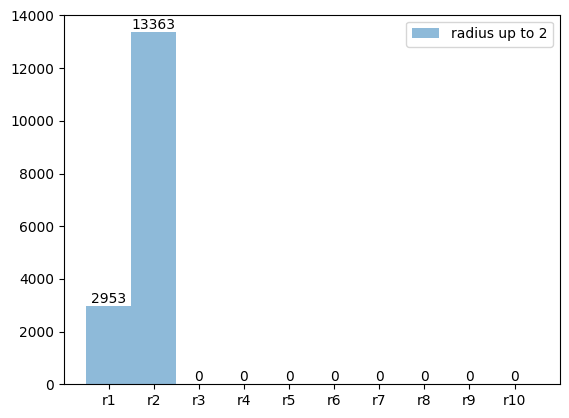

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=3


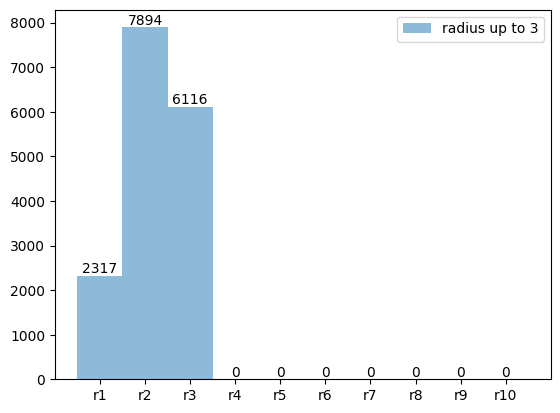

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=4


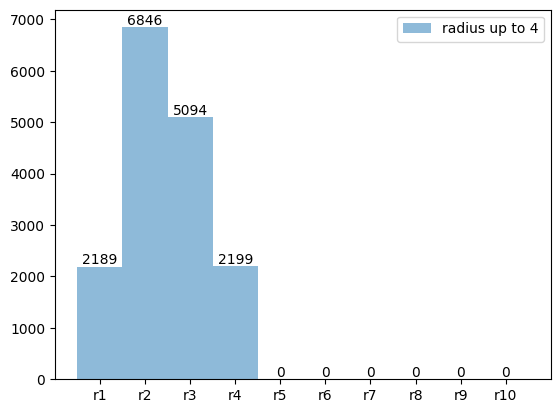

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=5


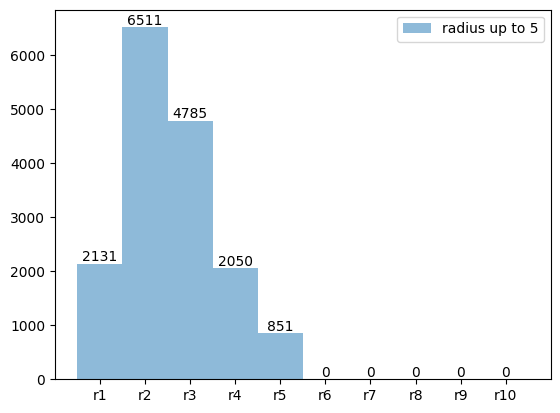

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=6


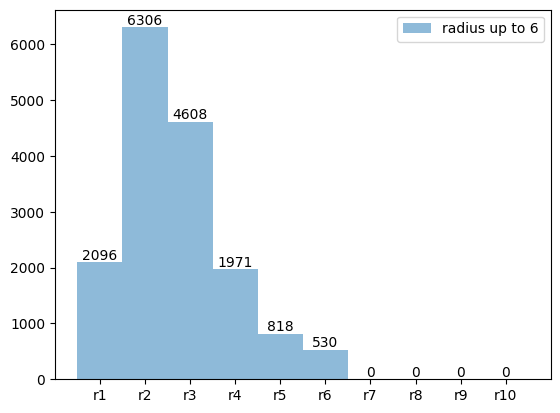

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=7


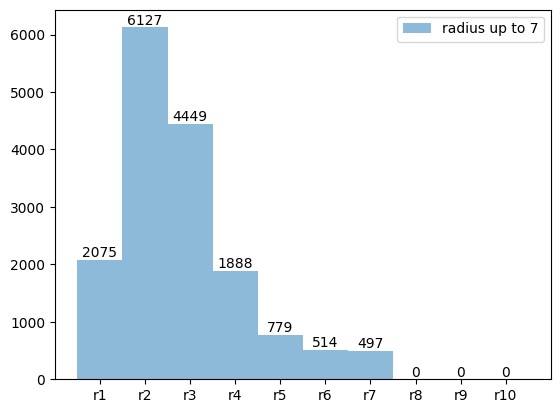

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=8


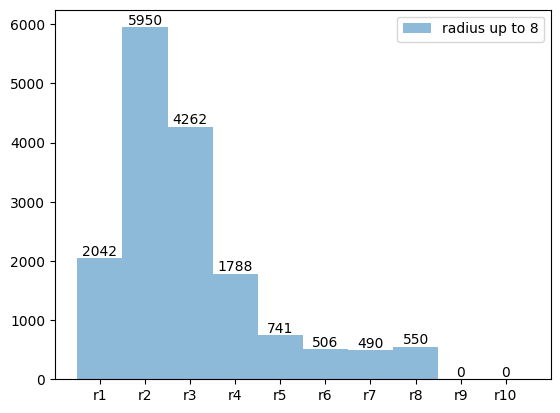

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=9


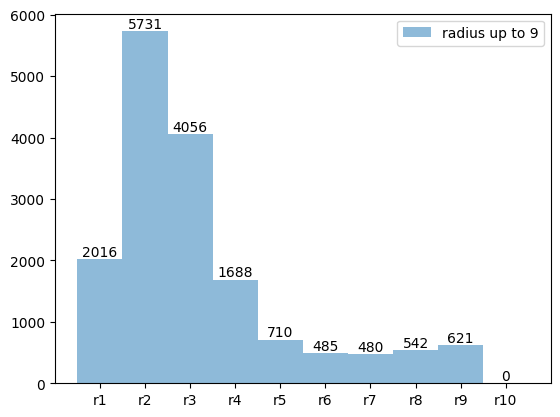

finish entropy list
Hash_Entropy_FP_loader is setup, out_dim=16384, max_radius=10


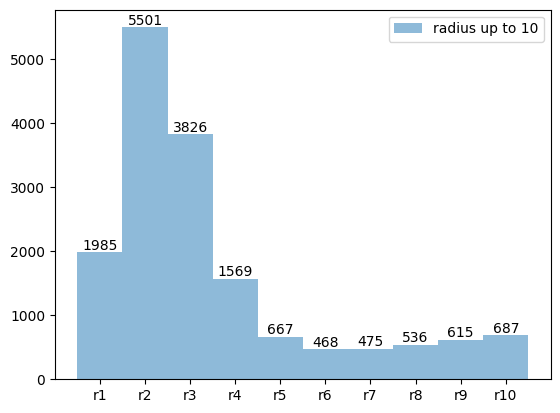

In [16]:
from matplotlib import pyplot as plt
import numpy as np
for radius in range(2, 11):
    fp_loader.setup(out_dim=16384, max_radius=radius)
    bitInfos_to_keep = fp_loader.bitInfos_to_fp_index_map.keys()
    radius_collection = [bitInfo[3] for bitInfo in bitInfos_to_keep]
    plt.figure()
    plt.xticks(range(1, 11), labels=[f"r{r}" for r in range(1,11)])
    plt.hist(radius_collection, bins=np.arange(1, 12) - 0.5, alpha=0.5, label='radius up to {}'.format(radius))
    
    # Add text to show the counts
    for i in range(1, 11):
        count = radius_collection.count(i)
        plt.text(i, count, str(count), ha='center', va='bottom')
    
    plt.legend()
    plt.show()

In [ ]:
# for k,v in map_bit_to_details.items():
#     if len(v) > 1:
#         print(k, v)
#         # print()
#     # else:
#     #     print(k, v[0])